[*********************100%***********************]  1 of 1 completed


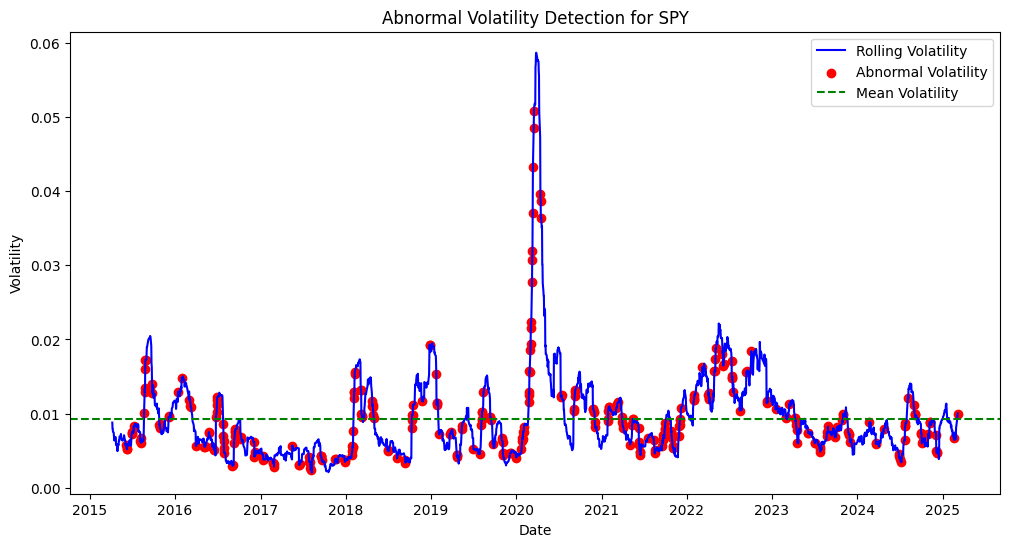

Abnormal Volatility Events:
Price      Rolling Volatility   Z-score
Ticker                                 
Date                                   
2015-06-03           0.005709 -2.436071
2015-06-08           0.005257 -2.469518
2015-06-09           0.005171 -2.166715
2015-06-29           0.007294  2.997221
2015-06-30           0.007332  2.463099
...                       ...       ...
2024-12-05           0.004920 -3.347491
2024-12-06           0.004688 -2.650713
2024-12-09           0.004813 -2.101877
2025-02-18           0.006716 -2.038745
2025-03-06           0.009926  2.186082

[331 rows x 2 columns]


In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Parameters
TICKER = "SPY"  # Change to your asset of interest
LOOKBACK = 20  # Rolling window for volatility calculation
THRESHOLD = 2  # Z-score threshold for abnormal volatility

# Fetch data
data = yf.download(TICKER, period="10y", interval="1d")
data["Returns"] = data["Close"].pct_change()

# Compute rolling volatility
rolling_vol = data["Returns"].rolling(LOOKBACK).std()
mean_vol = rolling_vol.rolling(LOOKBACK).mean()
std_vol = rolling_vol.rolling(LOOKBACK).std()

# Compute Z-score
z_score = (rolling_vol - mean_vol) / std_vol

data["Rolling Volatility"] = rolling_vol
data["Z-score"] = z_score
data["Abnormal Volatility"] = z_score.abs() > THRESHOLD

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data.index, rolling_vol, label="Rolling Volatility", color="blue")
plt.scatter(data.index[data["Abnormal Volatility"]], rolling_vol[data["Abnormal Volatility"]], color="red", label="Abnormal Volatility")
plt.axhline(mean_vol.mean(), color="green", linestyle="--", label="Mean Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title(f"Abnormal Volatility Detection for {TICKER}")
plt.legend()
plt.show()

# Print flagged dates
abnormal_dates = data[data["Abnormal Volatility"]].index
df_abnormal = data.loc[abnormal_dates, ["Rolling Volatility", "Z-score"]]
print("Abnormal Volatility Events:")
print(df_abnormal)


Refer to Losing is Optional: Retail Option Trading
 and Expected Announcement Volatility∗ page 16